In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1255,ham,Just wait till end of march when el nino gets ...,NaN,NaN,NaN
4240,ham,Detroit. The home of snow. Enjoy it.,NaN,NaN,NaN
133,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,NaN,NaN,NaN
5476,ham,Yes princess! I want to please you every night...,NaN,NaN,NaN
993,ham,The Xmas story is peace.. The Xmas msg is love...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1.DATA CLEANING
#2.EDA
#3.TEXT PREPROCESSING
#4.MODEL BUILDING
#5.EVALUATION
#6.IMPROVEMENT
#7.WEBSITE
#8.DEPLOY

DATA CLEANING


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last three columns due to null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2789,ham,When you are big..| God will bring success.
4440,ham,I'm going 2 orchard now laready me reaching so...
4681,ham,"Haha yeah, 2 oz is kind of a shitload"
2815,ham,Genius what's up. How your brother. Pls send h...
3855,ham,I'm ok. Will do my part tomorrow


In [9]:
 #Renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
4935,ham,K..k.:)congratulation ..
2621,ham,Lol! Nah wasn't too bad thanks. Its good to b ...
4920,ham,Its so common hearin How r u? Wat r u doing? H...
1322,ham,Oh just getting even with u.... u?
1941,spam,WELL DONE! Your 4* Costa Del Sol Holiday or å£...


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['target']=le.fit_transform(df['target'])

In [13]:
 df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
 #missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
#remove duplicates 
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

 EDA

In [19]:
 df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x20381371a50>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

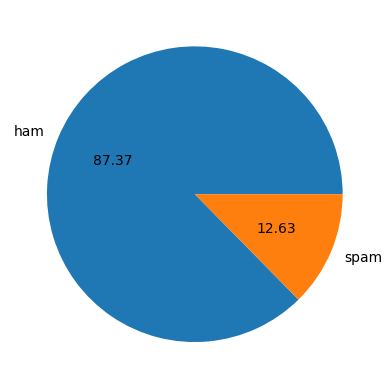

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [22]:
#Data is imbalanced 

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_chars']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#no of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#ham
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#spam
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
import seaborn as sns

<AxesSubplot: xlabel='num_chars', ylabel='Count'>

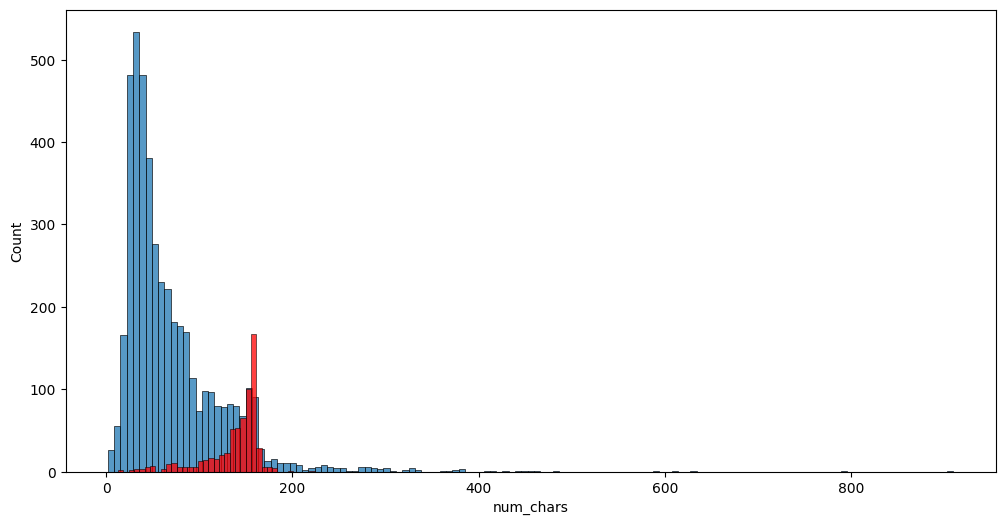

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

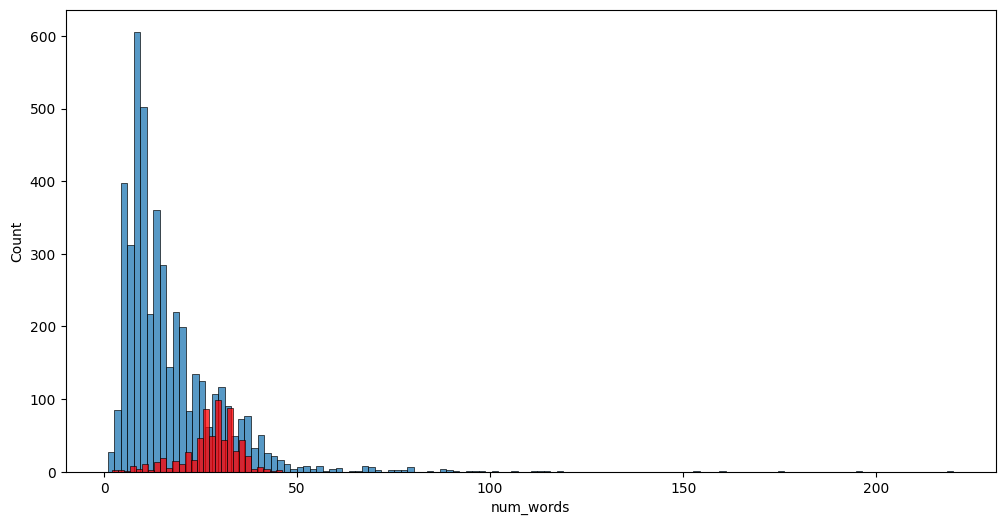

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

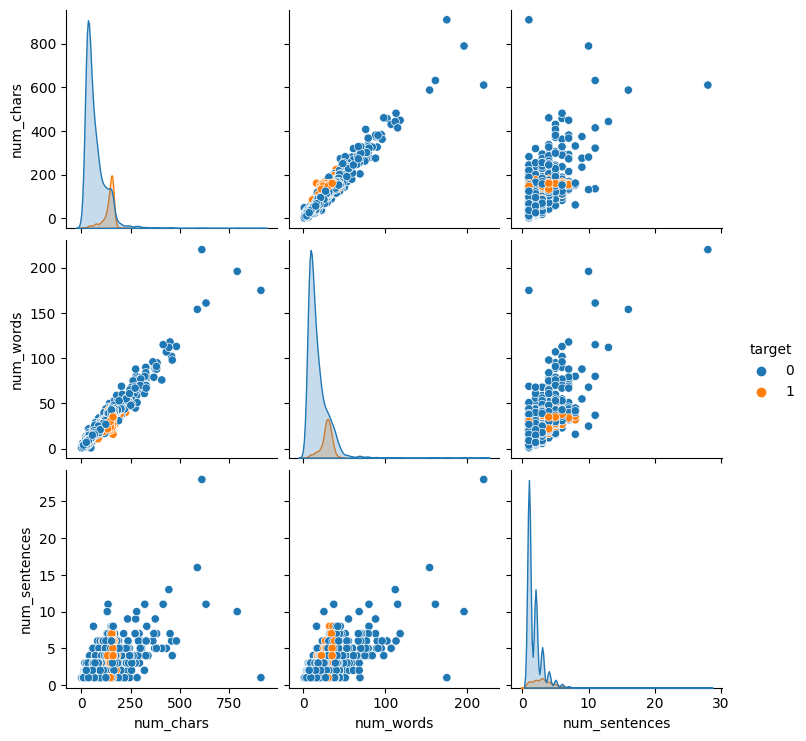

In [37]:
sns.pairplot(df,hue='target')

C:\Users\anith\AppData\Local\Temp\ipykernel_9764\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

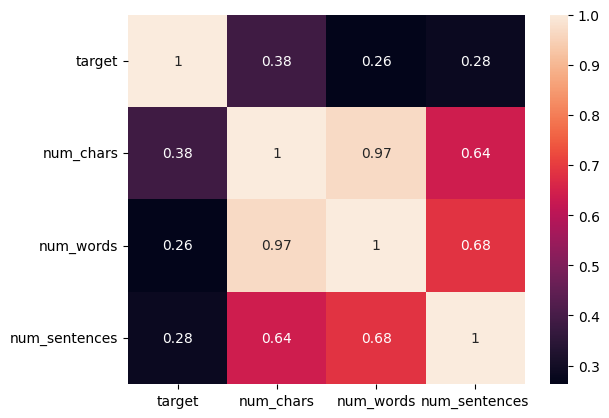

In [38]:
sns.heatmap(df.corr(),annot=True)

DATA PROCESSING
lower case
tokenization
removing special characters
removing stop words and punctuation
stemming

In [44]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
     
        
        
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return y
    

In [47]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [45]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [50]:
df['transformed_text']=df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


wordcloud

In [56]:
!pip install wordcloud

     ------------------------------------ 152.1/152.1 kB 267.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [59]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

TypeError: Cannot use .str.cat with values of inferred dtype 'mixed'.

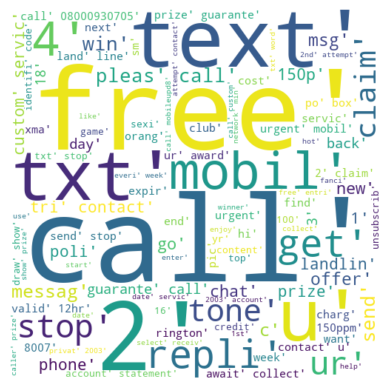

In [61]:
# Filter the DataFrame to get only the spam text and convert all elements to strings
spam_texts = df[df['target'] == 1]['transformed_text'].astype(str)

# Concatenate the strings using .str.cat
spam_text_concatenated = spam_texts.str.cat(sep=" ")

# Creating a WordCloud object
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

# Generating the word cloud
wc.generate(spam_text_concatenated)

# Displaying the word cloud (if you're using Jupyter Notebook or a similar environment)
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

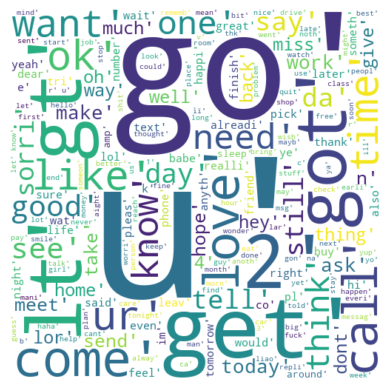

In [62]:
ham_texts = df[df['target'] == 0]['transformed_text'].astype(str)

# Concatenate the strings using .str.cat
ham_text_concatenated =ham_texts.str.cat(sep=" ")

# Creating a WordCloud object
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

# Generating the word cloud
wc.generate(ham_text_concatenated)

# Displaying the word cloud (if you're using Jupyter Notebook or a similar environment)
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [68]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg:
        spam_corpus.append(words)
        

In [69]:
len(spam_corpus)

9939

Counter({'call': 320, 'free': 191, '2': 155, 'txt': 141, 'text': 122, 'u': 119, 'ur': 119, 'mobil': 114, 'stop': 104, 'repli': 103, 'claim': 98, '4': 97, 'prize': 82, 'get': 74, 'new': 64, 'servic': 64, 'tone': 63, 'send': 60, 'urgent': 57, 'nokia': 57, 'contact': 56, 'award': 55, 'phone': 52, 'cash': 51, 'pleas': 51, 'week': 49, 'win': 48, 'c': 45, 'collect': 45, 'min': 45, 'custom': 42, 'messag': 42, 'guarante': 42, 'per': 41, 'chat': 38, 'tri': 37, 'msg': 35, 'draw': 35, 'number': 35, 'cs': 35, 'show': 33, 'today': 33, 'offer': 33, 'line': 33, 'go': 32, 'receiv': 31, 'want': 31, 'latest': 30, 'rington': 30, 'landlin': 30, '150ppm': 29, 'video': 29, '1': 28, 'voucher': 28, 'code': 27, 'holiday': 27, 'rate': 26, 'network': 26, 'select': 26, '150p': 26, 'date': 26, 'box': 26, 'day': 26, 'everi': 26, 'appli': 24, 'r': 24, 'cost': 24, 'end': 24, 'po': 24, 'orang': 24, 'await': 24, 'camera': 23, 'chanc': 22, 'charg': 22, 'sm': 22, 'live': 22, 'poli': 22, 'attempt': 22, 'entri': 21, 'word'

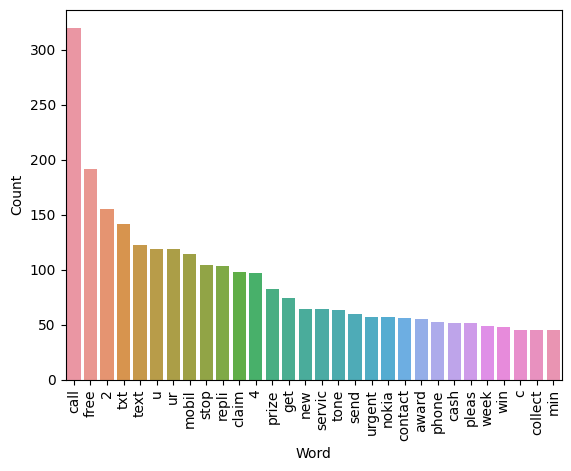

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you already have a list 'spam_corpus' containing the text data

# Count the occurrences of each word in 'spam_corpus'
word_counts = Counter(spam_corpus)
print(word_counts)

# Create a DataFrame with the most common 30 words and their counts
top_30_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create the bar plot using Seaborn
sns.barplot(x='Word', y='Count', data=top_30_words_df)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [81]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg:
        ham_corpus.append(words)


In [82]:
len(ham_corpus)

35394

Counter({'u': 883, 'go': 404, 'get': 349, 'gt': 288, 'lt': 287, '2': 284, 'come': 275, 'got': 236, 'know': 236, 'like': 234, 'call': 233, 'time': 219, 'ok': 217, 'love': 216, 'good': 213, 'want': 208, 'ur': 197, 'day': 190, 'need': 170, 'one': 165, 'lor': 159, '4': 156, 'home': 152, 'think': 149, 'see': 147, 'take': 143, 'still': 143, 'da': 138, 'tell': 133, 'make': 129, 'say': 127, 'back': 127, 'today': 123, 'hope': 122, 'ask': 121, 'sorri': 121, 'n': 120, 'send': 120, 'r': 120, 'work': 118, 'dont': 118, 'meet': 112, 'hi': 111, 'well': 109, 'thing': 109, 'wat': 108, 'k': 107, 'much': 107, 'night': 107, 'oh': 106, 'miss': 106, 'happi': 104, 'give': 102, 'later': 100, 'hey': 100, 'great': 97, 'na': 96, 'wait': 96, 'way': 95, 'alreadi': 90, 'thank': 87, 'let': 86, 'yeah': 86, 'text': 85, 'feel': 83, 'realli': 83, 'pl': 83, 'wan': 81, 'dear': 81, 'right': 80, 'e': 77, 'even': 77, 'friend': 76, 'sure': 76, 'said': 76, 'co': 76, 'would': 75, 'leav': 75, 'lol': 74, 'babe': 74, 'pleas': 74, '

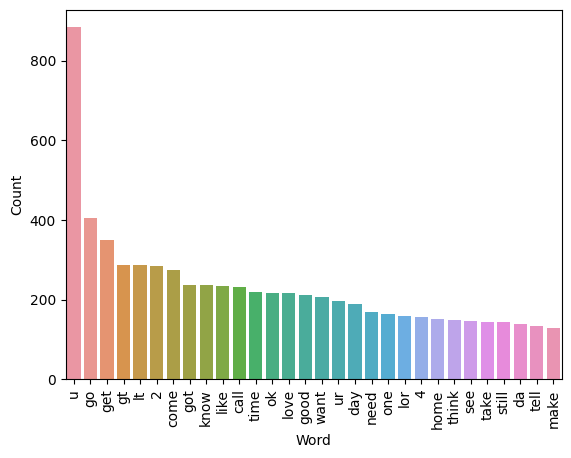

In [83]:
word_counts = Counter(ham_corpus)
print(word_counts)

# Create a DataFrame with the most common 30 words and their counts
top_30_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create the bar plot using Seaborn
sns.barplot(x='Word', y='Count', data=top_30_words_df)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


# MODEL BUILDING

here we will convert in input text(transformed_text) to numerical form as our taget is in numerical 0 or 1

In [86]:
df['transformed_text']

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: transformed_text, Length: 5169, dtype: object

In [87]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [156]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [157]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [158]:
X.shape

(5169, 6708)

In [159]:
y=df['target'].values

In [160]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [162]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [163]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [164]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723897911832946
[[991 139]
 [ 26 137]]
0.4963768115942029


In [165]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9659706109822119
[[1102   28]
 [  16  147]]
0.84


In [166]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9698375870069605
[[1127    3]
 [  36  127]]
0.9769230769230769


In [167]:
X1=tfidf.fit_transform(df['transformed_text']).toarray()

In [168]:
X1.shape

(5169, 3000)

In [169]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=2)

In [170]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [171]:
gnb1=GaussianNB()
mnb1=MultinomialNB()
bnb1=BernoulliNB()

In [172]:
gnb1.fit(x_train,y_train)
y_pred1=gnb1.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8662026295436969
[[990 140]
 [ 33 130]]
0.48148148148148145


In [173]:
mnb1.fit(x_train,y_train)
y_pred2=mnb1.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729311678267595
[[1130    0]
 [  35  128]]
1.0


In [174]:
bnb1.fit(x_train,y_train)
y_pred3=bnb1.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9837587006960556
[[1128    2]
 [  19  144]]
0.9863013698630136


# TFIDF-MNB


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [176]:
!pip install xgboost


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [177]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [178]:
models={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'XGB':xgb
}

In [179]:
def train_classifier(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [180]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9737045630317092, 0.9777777777777777)

In [181]:
accuracy_scores=[]
precision_scores=[]
for name,model in models.items():
    current_accuracy,current_precision=train_classifier(model,x_train,y_train,x_test,y_test)
    print("For ",name)
    print("Accuracy- ",current_accuracy)
    print("Precision- ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy-  0.9737045630317092
Precision-  0.9777777777777777
For  KN
Accuracy-  0.9095127610208816
Precision-  1.0
For  NB
Accuracy-  0.9729311678267595
Precision-  1.0
For  DT
Accuracy-  0.9288476411446249
Precision-  0.808695652173913
For  LR
Accuracy-  0.9574632637277649
Precision-  0.9655172413793104
For  RF
Accuracy-  0.9791183294663574
Precision-  0.9927536231884058
For  AdaBoost
Accuracy-  0.9636504253673627
Precision-  0.9264705882352942
For  BgC
Accuracy-  0.9590100541376644
Precision-  0.8666666666666667
For  XGB
Accuracy-  0.9675174013921114
Precision-  0.9481481481481482


In [182]:
performance_df=pd.DataFrame({'Algorithms':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values("Accuracy",ascending=False)

In [183]:
performance_df

,Algorithms,Accuracy,Precision
5,RF,0.979118,0.992754
0,SVC,0.973705,0.977778
2,NB,0.972931,1.000000
8,XGB,0.967517,0.948148
6,AdaBoost,0.963650,0.926471
7,BgC,0.959010,0.866667
4,LR,0.957463,0.965517
3,DT,0.928848,0.808696
1,KN,0.909513,1.000000


In [184]:
performance_df1=pd.melt(performance_df,id_vars='Algorithms')
performance_df1

,Algorithms,variable,value
0,RF,Accuracy,0.979118
1,SVC,Accuracy,0.973705
2,NB,Accuracy,0.972931
3,XGB,Accuracy,0.967517
4,AdaBoost,Accuracy,0.963650
5,BgC,Accuracy,0.959010
6,LR,Accuracy,0.957463
7,DT,Accuracy,0.928848
8,KN,Accuracy,0.909513
9,RF,Precision,0.992754


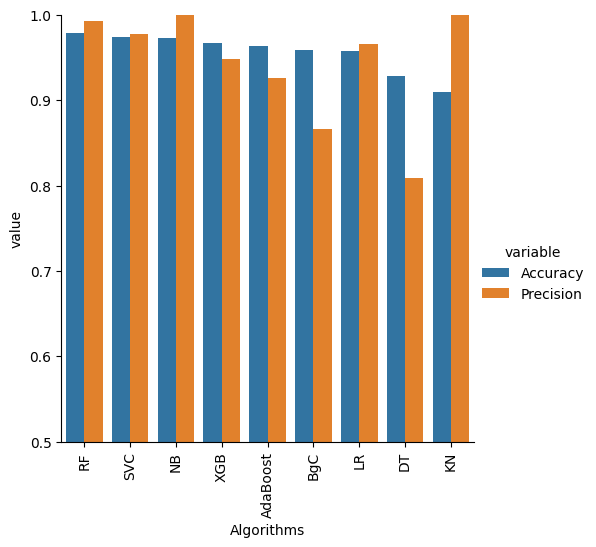

In [185]:
sns.catplot(x='Algorithms',y='value',
           hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [186]:
#model improve
#1. Change the max_features parameter of tfidf (for how many words we want to vectorize)

In [187]:
temp_df=pd.DataFrame({'Algorithms':models.keys(),'Accuarcy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [188]:
performance_df.merge(temp_df,on='Algorithms')

,Algorithms,Accuracy,Precision,Accuarcy_max_ft_3000,Precision_max_ft_3000
0,RF,0.979118,0.992754,0.979118,0.992754
1,SVC,0.973705,0.977778,0.973705,0.977778
2,NB,0.972931,1.000000,0.972931,1.000000
3,XGB,0.967517,0.948148,0.967517,0.948148
4,AdaBoost,0.963650,0.926471,0.963650,0.926471
5,BgC,0.959010,0.866667,0.959010,0.866667
6,LR,0.957463,0.965517,0.957463,0.965517
7,DT,0.928848,0.808696,0.928848,0.808696
8,KN,0.909513,1.000000,0.909513,1.000000
